In [1]:
######### Question 7 #########

### a ###
using DataFrames, CSV, LinearAlgebra
oil = CSV.read("oil-well-drilling-costs.csv", DataFrame)

using StatsModels
fo = @formula(Cost ~ 1 + Depth)
A = modelmatrix(fo.rhs, oil)      # model matrix
b = vec(modelmatrix(fo.lhs, oil)) # the response

16-element Vector{Float64}:
  2596.8
  3328.0
  3181.1
  3198.4
  4779.9
  5905.6
  5769.2
  8089.5
  4813.1
  5618.7
  7736.0
  6788.3
  7840.8
  8882.5
 10489.5
 12506.6

In [2]:
### b ###
∇f(x) = A'*A*x - A'*b 

∇f (generic function with 1 method)

In [3]:
### c ###
H(x) = A'*A

H (generic function with 1 method)

In [4]:
#### d ###
function steep(f, ∇f, x; α=0.01, ϵ=1e-1, k=10)
    i = 1
    while norm(∇f(x)) > ϵ
        p = -∇f(x)   # steepest descent direction
        
        # fixed step size for now

        x = x + α*p  # the new iterate
        i % k == 0 && println("iteration ", i, ". x = ", x)
        i += 1
    end
    return x
end

steep (generic function with 1 method)

In [5]:
#### e ###
function newton(f, ∇f, H, x; α=1, ϵ=1e-1, k=10)
    i = 1
    while norm(∇f(x)) > ϵ
        p = -inv(H(x))*∇f(x)   # descent direction
        
        # fixed step size for now

        x = x + α*p  # the new iterate
        i % k == 0 && println("iteration ", i, ". x = ", x)
        i += 1
    end
    return x
end

newton (generic function with 1 method)

In [6]:
### f ###
x0 = [-2200, 0.5] # initial guess
steep(fo, ∇f, x0, α=0.000000001, k=1000000) #using steepest desent method (takes a long time)
newton(fo, ∇f, H, x0, α=1, k=1) #using Newton method (only takes one iteration)

iteration 1000000. x = [-2200.101704912673, 0.9951222406213811]
iteration 2000000. x = [-2200.2033283276332, 0.9951330895727393]
iteration 3000000. x = [-2200.304817565583, 0.9951439241998413]
iteration 4000000. x = [-2200.4061728039305, 0.9951547445216261]
iteration 5000000. x = [-2200.507394219409, 0.9951655505569614]
iteration 6000000. x = [-2200.608481988948, 0.9951763423247354]
iteration 7000000. x = [-2200.709436288605, 0.9951871198437434]
iteration 8000000. x = [-2200.810257295004, 0.9951978831328413]
iteration 9000000. x = [-2200.910945183918, 0.9952086322107938]
iteration 10000000. x = [-2201.0115001312743, 0.9952193670963823]
iteration 11000000. x = [-2201.111922312338, 0.9952300878083175]
iteration 12000000. x = [-2201.212211902817, 0.9952407943653575]
iteration 13000000. x = [-2201.312369077369, 0.9952514867861478]
iteration 14000000. x = [-2201.412394010786, 0.9952621650893487]
iteration 15000000. x = [-2201.5122868781314, 0.9952728292936497]
iteration 16000000. x = [-2201

LoadError: InterruptException:

In [7]:
### g ###
using GLM
lm(fo, oil)  # to check our solution

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Cost ~ 1 + Depth

Coefficients:
────────────────────────────────────────────────────────────────────────────────
                   Coef.   Std. Error      t  Pr(>|t|)     Lower 95%   Upper 95%
────────────────────────────────────────────────────────────────────────────────
(Intercept)  -2277.07     765.499      -2.97    0.0100  -3918.9       -635.238
Depth            1.00334    0.0853205  11.76    <1e-07      0.820345     1.18633
────────────────────────────────────────────────────────────────────────────────

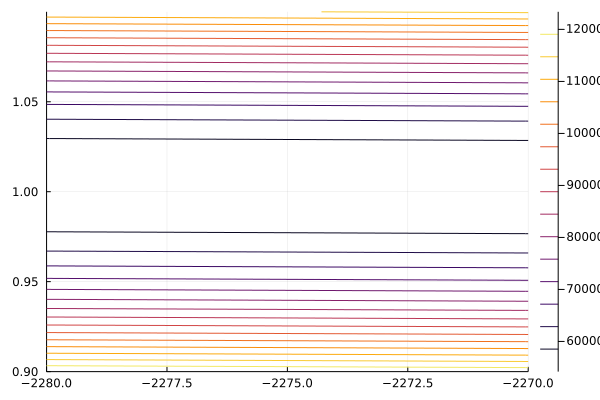

In [9]:
using Plots
f(x1,x2) = 0.5*(norm(A*[x1 x2]'-b))^2

intercept = range(-2280, -2270, length=1000)
depth = range(0.9, 1.1, length=1000)

contour(intercept, depth, f, fmt = :png)

# Both methods converge, however the steepest desent takes many iterations,
# and the Newton method only takes one.
# The steepest desent method performs very poorly because 
# it does not take into account the curvature in of the objective function.
# The Newton method takes into acount curvature information so it
# can find the minimum much quicker. 
# The curvature on this specific function looks quadratic so the 
# Newton direction is very reliable.